# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Borja Allo Casal   <br>
Url: https://github.com/zetaholic/SEMINARIO <br>
(el enlace lleva al repositorio, donde únicamente estará este notebook)<br>

Problema:

>3. Combinar cifras y operaciones

Descripción del problema:<br>
El problema consiste en analizar el siguiente problema y diseñar un algoritmo que lo resuelva:<br>
• Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división(/).<br>
• Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una
cantidad dada. Un ejemplo sería para obtener el 4:<br>

"4 + 2 - 6 / 3 * 1 = 4"

....

(*) La respuesta es obligatoria


                                        

###(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>


###¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones?




**Pregunta obligatoria:**<br>
Tenemos que olvidarnos de las restricciones y, por tanto, podemos repetir cifras y operadores. Las posibilidades aumentan considerablemente a si utilizamos restricciones. <br>
Para las cifras hay 9 posiciones: 9^9 = 387420489<br>
Para los operadores hay 8 posiciones: 4^8 = 65536<br>
EL nº total de expresiones sin restricciones es: 387420489 x 65536 = 25389989167104<br>
<br>
**Pregunta opcional:**<br>
Al tener en cuenta las restricciones, y como los operadores no se pueden repetir, solamente vamos a poder utilizar 5 cifras en cada expresión (y ninguna de ellas repetida).<br>
1. Cifras:<br>
  *   Solamente 5 cifras de las 9: combinatoria de "9 sobre 5". Resultado = 126
  *   Posición de las 5 cifras: 5! = 120

2. Operadores: 4! = 24<br>

Total de posibilidades: 126 x 120 x 24 = 362880

In [8]:
# Respuesta a la pregunta obligatoria

cifras_totales = 9 ** 9 # Sin restricciones de NO repetición de cifras
operadores_totales = 4 ** 8 # Hay 8 huecos que llenar con operadores
posibilidades = cifras_totales * operadores_totales

print(f"Total de expresiones posibles sin restricciones: {cifras_totales} x {operadores_totales} = {posibilidades}")


Total de expresiones posibles sin restricciones: 387420489 x 65536 = 25389989167104


In [9]:
# Respuesta a la pregunta opcional

import math

combinatoria_cifras = math.comb(9, 5) # Combinatoria "9 sobre 5"
permutaciones_cifras = math.factorial(5)
permutaciones_operadores = math.factorial(4)

# Total de posibilidades
total_posibilidades = combinatoria_cifras * permutaciones_cifras * permutaciones_operadores

print(f"Número total de expresiones posibles cumpliendo todas las restricciones: {total_posibilidades}")


Número total de expresiones posibles cumpliendo todas las restricciones: 362880


###Modelo para el espacio de soluciones<br>
###(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


En un primer momento estuve pensando en utilizar solamente listas para almacenar tanto las cifras como los operadores, debido a su versatilidad en cuanto a recorrerlas y modificarlas.<br>
Pero debido a la naturaleza del problema, y aprovechando las menciones a los iteradores combinatorios del módulo "intertool"; tras buscar información sobre su uso, considero que esta segunda opción es la más correcta. Los motivos:
* Las listas serían menos eficientes al tener que ir almacenando todas las combinaciones y permutaciones posibles.
* Hacerlo con listas significaría construir varios bucles anidados y lógica adicional para evitar repeticiones.
* Si utilizo iteradores combinatorios (como "itertools.combinations( )" o "intertools.permutation( )") puedo generar todas las combinaciones posibles de 5 cifras distintas entre las 9 disponibles, y generar todas las permutaciones posibles de esas cifras y de los 4 operadores.
* Usar el módulo intertool me permite generarlas sin almacenar grandes volúmenes en memoria y ser más eficiente.

Por tanto, la estructura de datos que mejor se adapta al problema es el uso de iteradores combinatorios (módulo intertool), junto con listas para construir y evaluar las expresiones.

In [10]:
import itertools


digitos = [str(i) for i in range(1, 10)] # Cifras disponibles
operadores = ['+', '-', '*', '/'] # Operadores disponibles

total_expresiones = 0 # Añado contador de expresiones

# Combinaciones de 5 cifras entre 9
for cifras in itertools.combinations(digitos, 5):
    # Permutaciones de esas 5 cifras
    for perm_cifras in itertools.permutations(cifras):
        # Permutaciones de los 4 operadores
        for perm_ops in itertools.permutations(operadores):
            # Construcción de la expresión final
            expresion = ""
            for i in range(4):
                expresion += perm_cifras[i] + perm_ops[i]
            expresion += perm_cifras[4]
            total_expresiones += 1

print("Número total de expresiones posibles:", total_expresiones) # Que coincidirá con la respuesta a la pregunta opcional anterior


Número total de expresiones posibles: 362880


###Según el modelo para el espacio de soluciones<br>
###(*)¿Cual es la función objetivo?

###(*)¿Es un problema de maximización o minimización?

**La función objetivo**<br>
Queremos evaluar el valor numérico de cada expresión generada: todas las expresiones posibles, formadas por 5 cifras distintas (elegidas entre 1 y 9), y los 4 operadores básicos (sin repetir ninguno).<br>
Con ello, queremos conseguir el conjunto de resultados numéricos enteros posibles.<br>
Por tanto, la función objetivo será el valor entero que resulte de evaluar cada expresión:<br>

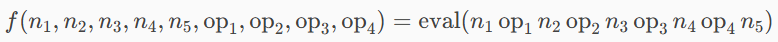 <br>

Siendo:
* n1, n2, n3, n4 y n5: cifras seleccionadas del 1 al 9 (sin repetir)
* op1, op2, op3 y op4: operadores básicos (sin repetir)

**¿Maximización o minimización?**

El problema, como se incluye en el enunciado, busca tanto el valor máximo como el mínimo que se puede conseguir con las expresiones generadas. Creo que podríamos considerarlo de maximización si nos centramos en encontrar la expresión válidad que de el valor máximo posible y viceversa.<br>
Otra cuestión, también planteada por el enunciado, es saber si se podrían conseguir todos los números enteros entre el máximo y el mínimo. Es poco probable, aunque podríamos averiguarlo ejecutanto un modelo del algoritmo completo.

In [11]:
import itertools
import random

# Voy a generar un ejemplo con una muestra aleatoria
digitos = [str(i) for i in range(1, 10)] # Todas las crifras del 1 al 9
operadores = ['+', '-', '*', '/']

resultados_enteros = set()
muestras = 15000  # Para el ejemplo vamos a utilizar 15000 muestras. Pero lo dejo con opción de subir o bajar el número de muestras

def evaluar(expr):
    try:
        resultado = eval(expr) # Uso eval(), pero aplicando el filtro siguiente
        if resultado == int(resultado):  # Solo enteros
            return int(resultado)
    except ZeroDivisionError: # Divisiones entre 0. A priori no debería hacer falta. No hay posibilidades de divisiones entre 0; pero por si acaso hay algún error
        return None
    return None

for _ in range(muestras): # Genero las entradas aleatorias
    cifras = random.sample(digitos, 5)
    ops = random.sample(operadores, 4)
    expr = ""
    for i in range(4): # Inicio bucle para ir construyendo la expresión generada en un string
        expr += cifras[i] + ops[i]
    expr += cifras[4]
    resultado = evaluar(expr) # Uso la función creada (que es como una modificación del "eval()", pero incluye la "criba" de las divisiones entre 0)
    if resultado is not None:
        resultados_enteros.add(resultado) # Voy añadiendo los resultados enteros

# Análisis de resultados
minimo = min(resultados_enteros)
maximo = max(resultados_enteros)
faltantes = [i for i in range(minimo, maximo + 1) if i not in resultados_enteros] # Compruebo los faltantes entre el mín. y el máx.

print(f"Valores enteros encontrados: {len(resultados_enteros)}")
print(f"Valor mínimo: {minimo}")
print(f"Valor máximo: {maximo}")
print(f"¿Todos los enteros entre mínimo y máximo están presentes?: {len(faltantes) == 0}")
if faltantes:
    print(f"Valores faltantes: {faltantes[:10]}{'...' if len(faltantes) > 10 else ''}")


Valores enteros encontrados: 142
Valor mínimo: -67
Valor máximo: 77
¿Todos los enteros entre mínimo y máximo están presentes?: False
Valores faltantes: [-66, -54, -50]


###Diseña un algoritmo para resolver el problema por fuerza bruta

**Pregunta opcional:**<br>

Diseñar un algoritmo por fuerza bruta supone explorar y evaluar **todas** las expresiones posibles (dentro de las restricciones) y almacenar aquellas que sean válidas (que cumplan el requisito de ser un número entero).<br>
Sería como llevar el ejemplo con muestras limitadas que hice antes, pero evaluando todas las opciones existentes.<br>
Pasos que he intentado seguir:

1.   Generar todas las combinaciones posibles de 5 cifras (escogiendo números entre el 1 y el 9).
2.   Para cada combinación de las cifras: generar todas las permutaciones u ordenaciones posibles de ellos (orden de aparición en la expresión).
3.   Para cada ordenación de cifras, generar todas las permutaciones u ordenaciones posibles de los 4 operadores disponibles.
4.   Construir la expresión final: con la estructura "cifra 1, operador 1, cifra 2, operador 2,..., operador 4, cifra 5".
5.   Evaluar la expresión: sin divisiones entre 0 y que sean enteros.
6.   Guardar los resultados que cumplan.

Por fuerza bruta se considerarán todas las expresiones, pero la ejecución del código es muy exigente.

In [12]:
# Diseño por FUERZA BRUTA

import itertools

digitos = [str(i) for i in range(1, 10)]
operadores = ['+', '-', '*', '/']

expresiones_validas = [] # Voy a guardar todas las expresiones generadas que den un número entero
r_enteros = [] # Voy a guardar todos los enteros generados

def evaluar(expr): # Igual que hice en el ejemplo con muestra aleatoria
    try:
        resultado = eval(expr)
        if resultado == int(resultado):
            return int(resultado)
    except ZeroDivisionError:
        return None
    return None

# Todas las combinaciones posibles
for cifras in itertools.combinations(digitos, 5): # Combinatoria "9 sobre 5"
    for perm_cifras in itertools.permutations(cifras): # Permutaciones de las cifras anteriores
        for perm_ops in itertools.permutations(operadores): # Permutaciones de los operadores
            expr = "" # Donde almacenaré la expresión dentro del bucle
            for i in range(4):
                expr += perm_cifras[i] + perm_ops[i]
            expr += perm_cifras[4]
            resultado = evaluar(expr)
            if resultado is not None:
                expresiones_validas.append((expr, resultado)) # Mantengo expresión y resultado asociados
                r_enteros.append(resultado) # Me vale para calcular después el máximo y el mínimo


print(f"Total de expresiones válidas: {len(expresiones_validas)}") # Muestra todas las expresiones que den números enteros que se hayan generado
print(f"Valor mínimo: {min(r_enteros)}")
print(f"Valor máximo: {max(r_enteros)}")
print("Ejemplos:")
for expr, res in expresiones_validas[9:20]: # Para enseñar algunos de los resultados válidos obtenidos, escojo una muestra entre la pos. 9 y la 19
    print(f"{expr} = {res}")

Total de expresiones válidas: 90000
Valor mínimo: -69
Valor máximo: 77
Ejemplos:
1-3*4/2+5 = 0
1*3+4/2-5 = 0
1*3-4/2+5 = 6
1+3-4*5/2 = -6
1-3+4*5/2 = 8
1+3-5/2*4 = -6
1-3+5/2*4 = 8
1+3-5*4/2 = -6
1+3*5-4/2 = 14
1-3+5*4/2 = 8
1-3*5+4/2 = -12


###Calcula la complejidad del algoritmo por fuerza bruta

**Pregunta opcional:**<br>

A priori diría que se trata de una complejidad constante, ya que los parámetros de entrada son los mismos. Si tenemos en cuenta que los operadores básicos no varían y son siempre 4, solamente podrán elegirse 5 cifras para la expresión.<br>
Lo que sí puede cambiar, entonces, es de dónde seleccionamos esas cifras (En el problema, de 1 a 9).<br>

Por lo tanto, ese sería el valor "n" que realmente podría cambiar, siendo n = 9 en el problema.<br>

Complejidad:<br>
<br>

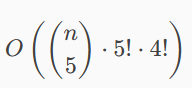

<br>

¿Sería, en parte, una complejidad factorial?

No sabría decirlo. De todas formas, el valor de la complejidad es:<br>
* Combinatoria de 9 sobre 5: 126
* 5! = 120
* 4! = 24

Complejidad teórica = 126 x 120 x 24 = 362880 <br>
<br>

Expresamos su complejidad así:<br>
<br>

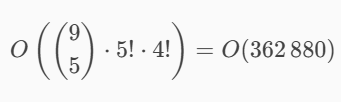



In [13]:
# Calcular la complejidad es casi lo mismo que hicimos en la primera pregunta opcional
import math

combinatoria_cifras = math.comb(9, 5) # Combinatoria de "9 sobre 5"
permutaciones_cifras = math.factorial(5) # 5!
permutaciones_operadores = math.factorial(4) # 4!

# Complejidad:
complejidad = combinatoria_cifras * permutaciones_cifras * permutaciones_operadores
print("Complejidad del algoritmo por fuerza bruta:")
print(f"  Combinaciones de cifras: {combinatoria_cifras}")
print(f"  Permutaciones de cifras: {permutaciones_cifras}")
print(f"  Permutaciones de operadores: {permutaciones_operadores}")
print(f"  Complejidad del algoritmo: {complejidad}")


Complejidad del algoritmo por fuerza bruta:
  Combinaciones de cifras: 126
  Permutaciones de cifras: 120
  Permutaciones de operadores: 24
  Complejidad del algoritmo: 362880


###(*)Diseña un algoritmo que mejore la complejidad del algoritmo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Si queremos mejorar la eficiencia del algoritmo, pero respetando las restricciones, podemos buscar una solución optimizada de la siguiente forma:

1. Filtrar divisiones no exactas: antes de evaluar la expresión, filtrar si esta ya dará un resultado NO entero. Si da decimal se descarta la expresión.

2. Filtrar divisiones innecesarias: si a < b, se evita a / b porque no dará un número entero.

3. Filtrar resultados duplicados: con el conjunto (set) lmacenamos solamente los resultados únicos (sin repetir).

4. se utiliza `eval()` para evaluar las expresiones después de aplicar los filtros anteriores (reduce el número de evaluaciones).

Aunque su complejidad (teórica) es la misma, a la hora de ejecutar el código se evalúan muchas menos expresiones. Mejoras:
* Menor tiempo de ejecución.
* Mejor uso de la memoria.
* Los resultados siguen siendo válidos.

In [14]:
import itertools

digitos = [str(i) for i in range(1, 10)]
operadores = ['+', '-', '*', '/']

resultados_validos = set() # Garantizamos almacenar resultados "únicos" (no repetidos)
expresiones_validas = [] # Almacenamos las expresiones que cumplan requisitos

def evaluar(expr): # Misma función ya creada antes (la creo de nuevo para contar todo como códigos independientes)
    try:
        resultado = eval(expr)
        if resultado == int(resultado):
            return int(resultado)
    except ZeroDivisionError:
        return None
    return None

for cifras in itertools.combinations(digitos, 5):
    for perm_cifras in itertools.permutations(cifras):
        for perm_ops in itertools.permutations(operadores):
            expr = ""
            aplicar_filtro = False # Inicializamos el filtro en False y a continuación comprobamos si lo pasa o no
            for i in range(4):
                a = int(perm_cifras[i])
                b = int(perm_cifras[i + 1])
                op = perm_ops[i]

                # Evitar a / b si a < b o división NO exacta
                if op == '/' and (a < b or a % b != 0):
                    aplicar_filtro = True
                    break

                expr += perm_cifras[i] + op
            if aplicar_filtro:
                continue
            expr += perm_cifras[4]

            resultado = evaluar(expr) # Evaluamos resultados DESPUÉS de aplicar los filtros (el algoritmo "trabaja" menos)
            if resultado is not None and resultado not in resultados_validos:
                resultados_validos.add(resultado)
                expresiones_validas.append((expr, resultado))

faltantes = [i for i in range(min(resultados_validos), max(resultados_validos) + 1) if i not in resultados_validos] # Compruebo si hay faltantes entre el mín. y el máx.

# Muestro los resultados. Sé que habrá resultados válidos, pero creo un "if-else" para evitar el error si no hubiese ninguno
if resultados_validos:
    print(f"Total de resultados enteros únicos: {len(resultados_validos)}")
    print(f"Los resultados enteros son: {resultados_validos}")
    print(f"¿Todos los enteros entre mínimo y máximo están presentes?: {len(faltantes) == 0}")
    print(f"Valor mínimo: {min(resultados_validos)}")
    print(f"Valor máximo: {max(resultados_validos)}")
    print("Ejemplos:")
    for expr, res in expresiones_validas[:10]:
        print(f"{expr} = {res}")
else:
    print("No se encontraron resultados válidos.")


Total de resultados enteros únicos: 147
Los resultados enteros son: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1}
¿Todos los enteros entre mínimo y máximo están presentes?: True
Valor mínimo: -69
Valor máximo: 77
Ejemplos:
1+3-4/2*5 = -6
1+3*4/2-5 = 2
1-3+4/2*5 = 8
1-3*4/2+5 = 0
1*3-4/2+5 = 6
1+3*5-4/2 = 14
1-3*5+4/2 = -12
1*4/2-3+5 = 4
2/1+3-4*5 = -15
2/1+3*4-5 = 9


A pesar de que, en un primer momento, creía que NO sería posible que se pudiesen obtener TODOS los números entre el **máximo posible (77)** y el **mínimo posible (-69)**; ***sí que se consiguen***. <br>

Por otro lado, comprobamos que el *algoritmo optimizado* solamente nos da **147** resultados válidos **únicos**. Enfrentando esto contra el *algoritmo por fuerza bruta* (que nos contó un total de **90000 expresiones válidas**, aunque **no únicas**), podemos ver que la diferencia es más que evidente.



###(*)Calcula la complejidad del algoritmo

Aunque con la optimización del algoritmo aplicamos filtros para evaluar solamente las expresiones necesarias, evitar redundancias, etc.; si mantenemos las restricciones, la complejidad teórica del nuevo algoritmo sigue siendo la misma que la del algoritmo por fuerza bruta.<br>
Sigue explorando el mismo número de combinaciones posibles, cifras y operadores; aunque no llegue a evaluarlas todas gracias a los filtros.<br>

Pero es cierto que, a la hora de ejecutarlo, el algoritmo optimizado reduce el número de operaciones que se ejecutan y el uso de recursos, aunque el orden de complejidad se mantenga.<br>
<br>
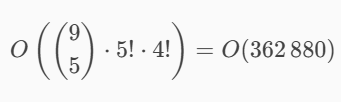

In [15]:
# Mismas restricciones y mismos parámetros de entrada: misma complejidad teórica
import math

combinatoria_cifras = math.comb(9, 5) # Combinatoria de "9 sobre 5"
permutaciones_cifras = math.factorial(5) # 5!
permutaciones_operadores = math.factorial(4) # 4!

# Complejidad teórica:
complejidad = combinatoria_cifras * permutaciones_cifras * permutaciones_operadores
print("Complejidad del algoritmo por fuerza bruta:")
print(f"  Combinaciones de cifras: {combinatoria_cifras}")
print(f"  Permutaciones de cifras: {permutaciones_cifras}")
print(f"  Permutaciones de operadores: {permutaciones_operadores}")
print(f"  Complejidad del algoritmo: {complejidad}")

Complejidad del algoritmo por fuerza bruta:
  Combinaciones de cifras: 126
  Permutaciones de cifras: 120
  Permutaciones de operadores: 24
  Complejidad del algoritmo: 362880


###Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

No respondida

###Aplica el algoritmo al juego de datos generado

No respondida

###Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

1. Manual de la asignatura Algoritmos de optimización.
2. Manual de la asignatura Pyhton para Inteligencia Artificial.
3. Canal de youtube: https://www.youtube.com/c/JohnOrtizOrdo%C3%B1ez
4. Librería de python: https://docs.python.org/3/library/itertools.html
5. Canal de youtube: https://www.youtube.com/@mouredev

###Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

No respondida